# 1. Background Information

## 1.1 Data source
- National Sleep Foundation www.sleepfoundation.org
- 2015 Sleep in America Poll

## 1.2 Data Collection & General Information
The National Sleep Foundation counducted an online survey study on sleep of Americans in December 2014 and obtained answers from 1,029 non-institutionalized adults aged 18 years or older who reside in the United States. The survey asked participants about their sleep quality, attitude toward sleep, time spent in bed, estimate of actual sleep obtained, how much do they think certain factors affect their sleep quality, etc.
    
Participants were selected via representative random sampling on Growth from Knowledge (GfK)'s KnowledgePanel. The KnowledgePanel initially used the Delivery Sequence File (DSF) of the United States Postal Service as the sampling frame to recruit panalists. The DSF covers almost 100% of the U.S. population. 
    
The study also asked participants about their perception of various types of pain. To narrow our area of interest for this project, we only used questions asking directly about sleep. Since this dataset is survey data, by using it, we assume that:

    Participants' answers reflect their true situations. 

## 1.3 Objective
College students, including our team members, have experienced unsatisfactory sleep quality. Especially during exam periods, our peers often express similar concerns as ourselves, that is, we do not have "good" sleep. Accordingly, we feel tired and hard to concentrate, or maybe even experience decreasing life quality. 

One thing that we have noticed is that with the increasing usage of mobile phones, we spent quite a considerable amount of time messing with our phone in bed before actually falling asleep and after waking up. Such behavior decreased our sleep effciency, that is, the proportion of time in bed actually spent on sleeping.  

Thus, we wonder whether sleeping efficiency has a relationship with sleep quality, as well as what are other factors that affect sleep quality. 

## 1.4 Relevant Studies & Theoretical Background
1. Webb, W. B., Friel, J. Sleep Stage and Personality Characteristics of "Natural" Long and Short Sleepers. (1971). *Science, 71(3971)*, 587-588. doi: 10.1126/science.171.3971.587.
 - Defines people who sleep 5.5 hours or less per night as "short sleepers", and people who sleep 9.5 hours or more as "long sleepers"  
  
  
2. Shrivastava, D., Jung, S., Saadat, M., Sirohi, R., Crewson, K. How to interpret the results of a sleep study. (2014). *J Community Hosp Intern Med Perspect, 4(5)*. doi: 10.3402/jchimp.v4.24983.
 - Defines sleep efficiency as "percentage of total time in bed actually spent in sleep"  
 
 
3. Asarnow, L. D., McGlinchey, E., Harvey, A. G. The Effects of Bedtime and Sleep Duration on Academic and Emotional Outcomes in a Nationally Representative Sample of Adolescents. (2014). *J Adolesc Health, 54(3)*. 350–356. doi:  10.1016/j.jadohealth.2013.09.004. 
   
   
3. Scutti, S.7 Health Consequences Of Going To Bed Past Midnight.(2013). *Medical Daily*. https://www.medicaldaily.com/7-health-consequences-going-bed-past-midnight-247247.

## 1.5 Variable Description

- All the values are self-reported

1. `Q10_a`: sleep quality, 5-point Likert Scale (1: very poor, 2: poor, 3: fair, 4: good, 5: very good)
2. `DOV_WEEKTIME`: average minutes spent in bed per day on weekdays
3. `DOV_WEEKEND`: average minutes spent in bed per day on weekends
4. `DOV_TOTALWEEK`: estimate of actual sleep obtained per day on weekdays (in minutes)
5. `DOV_TOTALWEEK`: estimate of actual sleep obtained per day on weekendss (in minutes)
6. `Q2_ampmA`: whether time went to bed on weekdays is a.m. or p.m.
7. `Q3_ampmA`: whether time went to bed on weekends is a.m. or p.m.
8. `Q14a`: how often do health problems make it difficult to get a good night’s sleep, 5-point Likert Scale (1: never, 2: rarely, 3: sometimes, 4: often, 5: always)
9. `Q15_a`: how often does outside noise (ex: street noise, sirens) make it more difficult to get a good night's sleep, 5-point Likert Scale (1: never, 2: rarely, 3: sometimes, 4: often, 5: always)
10. `Q15_b`: how often does inside noise (ex: television, other people, snoring) make it more difficult to get a good night's sleep, 5-point Likert Scale (1: never, 2: rarely, 3: sometimes, 4: often, 5: always)
11. `Q15_c`: how often does light (from either inside or outside) make it more difficult to get a good night's sleep, 5-point Likert Scale (1: never, 2: rarely, 3: sometimes, 4: often, 5: always)
12. `Q15_d`: how often does temperature (too hot or too cold) make it more difficult to get a good night's sleep, 5-point Likert Scale (1: never, 2: rarely, 3: sometimes, 4: often, 5: always)
13. `Q15_e`: how often does temperature (uncomfortable mattress) make it more difficult to get a good night's sleep, 5-point Likert Scale (1: never, 2: rarely, 3: sometimes, 4: often, 5: always)
14. `Q16`: how motivated to make sure have enough time to sleep, 5-point Likert Scale (1: extremely motivated, 2: very motivated, 3: somewhat motivated, 4: not that motivated, 5: not motivated at all)
15. `Q17`: how important a part of routine is going to bed at a suitable time, 5-point Likert Scale (1: extremely , 2: very important, 3: somewhat important, 4: not that important, 5: not important at all)
16. `Q22`: whether have been diagnosed sleep disorder (Yes/No)
17. `Q23`: answered only if answer for Q22 is 'Yes', what type of sleep disorder (3 choices: sleep apnea, insomnia, other sleep disorder)

Due to the different directions of the rating scale for different questions, we reverse coded some of the variables  in order to make `5` mean `'the most'` and `1` mean `'the least'` for all the variables. 

Also, we constructed a few new varibles to quantify features related to sleep and sleep quality. 
The procedures will be carefully discussed in the *Exploratory Data Analysis* section.  

# 2. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import HTML, display

In [2]:
# Import packages
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp
from IPython.core.interactiveshell import InteractiveShell
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tnrange, tqdm_notebook
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import label_binarize

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
# Load data
sleep = pd.read_excel("2015SleepinAmericaPollSleepandPainRawDataExcel.xlsx")

## 2.1 Data Cleaning & Variable Construction

In the original data, `'refuse to answer'` was encoded as `-1`. In the meantime, except for the conditional questions, few missing values were present. 
    
   Our first data cleaning procedure was filtering out observations have values missing for our major variables of interests: time in bed and actual sleep data. In particular, sleep quality does not have any missing value, so we did not filter with regards to this variable.

In [4]:
# Filter out observations without data for key variables of interets: time in bed and actual sleep data
sleep = sleep.loc[~(sleep.DOV_WEEKTIME.isna() | sleep.DOV_WEEKEND.isna() | sleep.DOV_TOTALWEEK.isna() | sleep.DOV_TOTALWEEKEND.isna())]

   In order to facilitate our study on sleep, we constrcuted some new variables by combining and mutating the raw variables. Since data on 'time in bed' and 'actual sleep' were collected seperately for weekdays and weekends in the original dataset, we calculated the average of time in bed and actual sleep throughout the week to obtain a more general picture of participants' sleep.  

   After that, we created a new variable called 
       ```'sleep efficiency'```
   by dividing average actual sleep per day by average in bed hours per day. The definition of sleep efficiency is given in the *Backgroud Information* section.  

   We found that 86 participants have sleep efficiency > 1. As the time spent on actual sleep was given as an estimate, we believe it is safe to assume that:
       
       This discrepancy comes from estimation, and these participants have decent sleep efficiency.

Therefore, for sleep efficiency larger than 1, we recoded it to 1.

In [5]:
# average hours in bed per day
sleep['avg_bed'] = (sleep.DOV_WEEKTIME/ 60 * 5 + sleep.DOV_WEEKEND / 60 * 2)/ 7
# average actual sleep in hours per day
sleep['avg_actual_sleep'] = (sleep.DOV_TOTALWEEK/ 60 * 5 + sleep.DOV_TOTALWEEKEND / 60 * 2)/ 7
 
# Define sleep efficiency as average actual sleep per day/average sleep hours per day
sleep['sleep_efficiency'] = sleep.avg_actual_sleep/sleep.avg_bed
sleep['sleep_efficiency_week'] = sleep.DOV_TOTALWEEK/sleep.DOV_WEEKTIME
sleep['sleep_efficiency_weekend'] = sleep.DOV_TOTALWEEKEND/sleep.DOV_WEEKEND

print("\n","The number of participants with sleep efficiency > 1 equals to "+str(sleep.loc[sleep.sleep_efficiency > 1].shape[0]),"\n")
sleep.loc[sleep.sleep_efficiency > 1, 'sleep_efficiency'] = 1
sleep.loc[sleep.sleep_efficiency_week > 1, 'sleep_efficiency_week'] = 1
sleep.loc[sleep.sleep_efficiency_weekend > 1, 'sleep_efficiency_weekend'] = 1

print("\n","After recoding: The number of participants with sleep efficiency > 1 equals to "+str(sleep.loc[sleep.sleep_efficiency > 1].shape[0]),"\n")


 The number of participants with sleep efficiency > 1 equals to 86 


 After recoding: The number of participants with sleep efficiency > 1 equals to 0 



We divided people who go to bed before and after 12 am into two categories, encoded as `"Before Mid-night"` and `"After Mid-night'` *(respectively for weekdays and weekends)*.

In [6]:
# Whether the person go to bed before or after mid-night on weekdays
sleep['before_mnt_week'] = 'Before Mid-night'
sleep.before_mnt_week.loc[sleep.Q2_ampmA == 1] = 'After Mid-night'
# Whether the person go to bed before or after mid-night on weekends
sleep['before_mnt_weekend'] = 'Before Mid-night'
sleep.before_mnt_weekend.loc[sleep.Q3_ampmA == 1] = 'After Mid-night'

Furthermore, we created a dummy variable that divides people with regards to whether they are 'sensitive' to environmental factors. The idea comes from our latter analysis that indicates participants' rating of effect of the five environmental factors are positively correlated. From there, we made this decision to combine these 5 variables and got a sense of which people are generally sensitive to environmental factors. People who have average rating  >= 4 (range: 1 - 5) for the effects of the 5 environmental factors are considered sensitive, and the newly constructed variable is called `'sensitive'`.


*We include this variable construction procedure here instead of later to optimize the consistency of our work. We will have a more thorough discussion about this new variable later.* 

In [7]:
# Sensitive to Environmental Factors
sleep['environ_sensitive'] = sleep.loc[:,['Q15_a', 'Q15_b','Q15_c', 'Q15_d', 'Q15_e']].mean(axis = 1)
sleep['sensitive'] = 0
sleep.sensitive.loc[sleep.environ_sensitive >= 4] = 1

As mentioned in the last section, we reverse coded some variables to make `5` always mean `'the most'` and `1` always mean `'the least'`. The two variables reverse coded are "Motivation to make sure you have enough time to sleep (`Q16`)" and "Importance of going to bed at a suitable time (`Q17`)". Once the reverse coding was done, `'_rev'` was added to the variable name. We noted that after the reverse coding, `'-1'` that represented `'refuse to answer'` was transformed into `'7'`. 

In [8]:
# Reverse Coding
def reverse_code(col):
    return col.max() - col + 1
# Motivation to make sure you have enough time to sleep
sleep['Q16_rev'] = reverse_code(sleep.Q16)

# Importance of going to bed at a suitable time
sleep['Q17_rev'] = reverse_code(sleep.Q17)

In the original data set, for `Q22` that asked whether the participants have been diagnosed sleep disorder, `'Yes'` was encoded as `1`, and `'No'` was encoded as `2`. To make the data more intuitive, we recoded `2` to `0`. 

In [9]:
# Sleep Disorders
sleep['Q22_rev'] = sleep.Q22
sleep.loc[sleep.Q22 == 2, 'Q22_rev'] = 0

## 2.2 Individual Variables 

### 2.2.1 Sleep Quality

We started to look into the key variable: sleep quality (range from 1-5 as 5 being highest quality) by using the summary statistics and a count plot, and found out most people fall into the region of 3-4. 

In [10]:
# Summary Statistics of Sleep Quality
sleep.Q10_a.describe()

count    1003.000000
mean        3.536391
std         0.933637
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Q10_a, dtype: float64

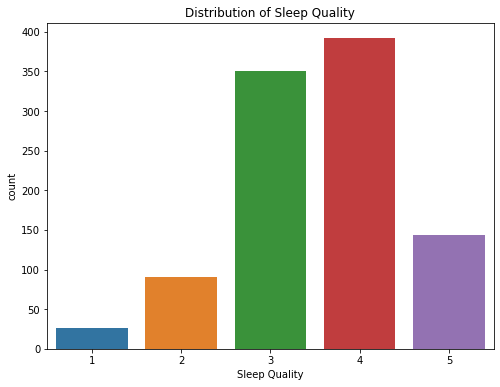

In [11]:
fig = plt.figure(figsize = [8,6])
sns.countplot(x="Q10_a", data=sleep)
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality');

### 2.2.2 Average Hours in Bed Per Day

For average hours in bed per day, we used summary statistics and plotted a histogram with the kde distribution overlayed on it to take a look of the variable's distribution. We found out that the distribution is relatively normal, and the mean average hours in bed is 8.14 per day for the participants.

In [12]:
# Summary Statistics of Average Hours in Bed Per Day
sleep.avg_bed.describe()

count    1003.000000
mean        8.148804
std         1.525840
min         1.000000
25%         7.321429
50%         8.000000
75%         8.750000
max        18.142857
Name: avg_bed, dtype: float64

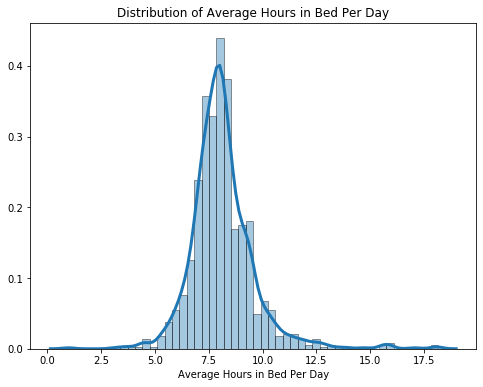

In [13]:
fig = plt.figure(figsize = [8,6])
sns.distplot(sleep.avg_bed, 
             hist = True, kde = True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.title('Distribution of Average Hours in Bed Per Day')
plt.xlabel('Average Hours in Bed Per Day');

**Outliers**  
We extracted outliers with very high hours in bed and very low hours in bed with regards to the Tukey's fences. We took a closer look at those outliers using summary statistics and count plots of their sleep quality. We found that for people with very low hours in bed, more people had lower quality. 

At the same time, for people with high hours in bed, their ratings of sleep quality were not very different from those of the general population.  

The findings are consistent with common belief about sleep. 

Number of People with Very Low Hours in Bed: 12
Sleep Quality of People with Very Low Hours in Bed
count    12.000000
mean      2.083333
std       1.240112
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: Q10_a, dtype: float64
Number of People with Very High Hours in Bed: 130
Sleep Quality of People with Very High Hours in Bed
count    130.000000
mean       3.569231
std        0.871054
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q10_a, dtype: float64


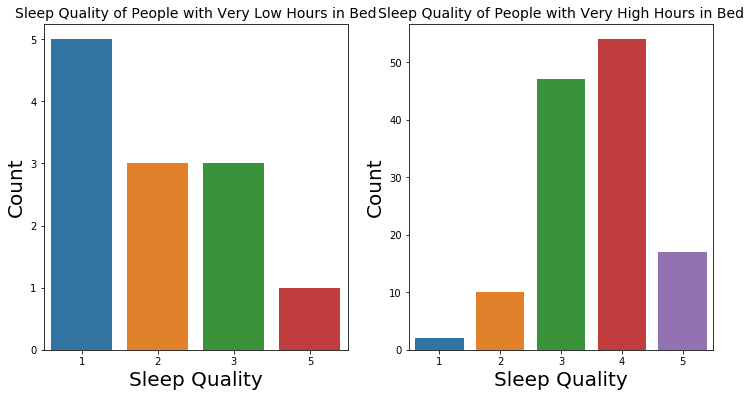

In [14]:
plt.figure(figsize = [12,6])

# Extract lower outliers for hours in bed
bed_Q1 = sleep['avg_bed'].quantile(0.25)
bed_Q3 = sleep['avg_bed'].quantile(0.75)
IQR = bed_Q3 - bed_Q1
bed_outlier_lower = sleep[(sleep.avg_bed <= bed_Q1 - 1.5 * IQR)]
print('Number of People with Very Low Hours in Bed: ' + str(bed_outlier_lower.shape[0]))
print('Sleep Quality of People with Very Low Hours in Bed')
print(bed_outlier_lower.Q10_a.describe())
bed_outlier_upper = sleep[(sleep.avg_bed >= bed_Q1 + 1.5 * IQR)]
print('Number of People with Very High Hours in Bed: ' + str(bed_outlier_upper.shape[0]))
print('Sleep Quality of People with Very High Hours in Bed')
print(bed_outlier_upper.Q10_a.describe())

# Sleep quality of people with very low hours in bed
plt.subplot(1,2,1)
sns.countplot(x="Q10_a", data=bed_outlier_lower)
plt.xlabel('Sleep Quality', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Sleep Quality of People with Very Low Hours in Bed', fontsize = 14)

# Sleep quality of people with very low hours in bed
plt.subplot(1,2,2)
sns.countplot(x="Q10_a", data=bed_outlier_upper)
plt.xlabel('Sleep Quality', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Sleep Quality of People with Very High Hours in Bed', fontsize = 14);

### 2.2.3 Average Actual Sleep Per Day in Hours

We again used histogram and summary statistics to look at participants' average actual sleep per day in hours. On average, participants indicated that they got an average of 7.03 hours of actual sleep per day, which is about 1.1 hours less than their average hours in bed. 

In [15]:
# Summary Statistics of Average Actual Sleep Per Day
sleep.avg_actual_sleep.describe()

count    1003.000000
mean        7.038990
std         1.248610
min         1.535714
25%         6.285714
50%         7.000000
75%         7.928571
max        12.750000
Name: avg_actual_sleep, dtype: float64

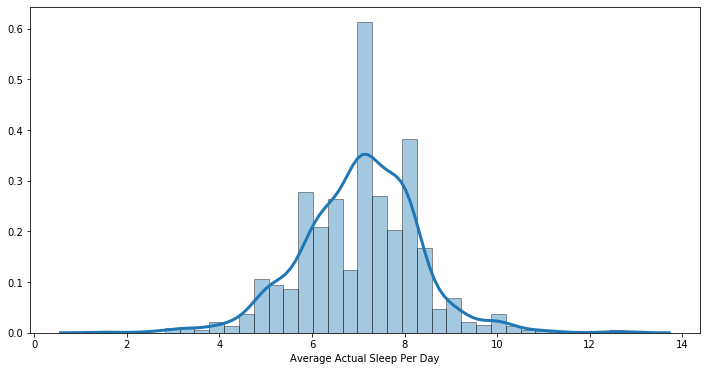

In [16]:
fig = plt.figure(figsize = [12,6])
sns.distplot(sleep.avg_actual_sleep, 
             hist = True, kde = True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('Distribution of Average Actual Sleep Per Day');
plt.xlabel('Average Actual Sleep Per Day');

**Outliers**  
We extracted and explored outliers with very high hours of actual sleep and very low hours of actual sleep using the Tukey's fences. We found that for people with very low hours of actual sleep, more people had lower sleep quality. At the same time, for people with high hours of actual sleep, their ratings of their sleep quality concentrate on 4. The findings are consistent with common belief about sleep.

Number of People with Very Little Actual Sleep: 36
Sleep Quality of People with Very Little Actual Sleep
count    36.000000
mean      2.277778
std       1.031258
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: Q10_a, dtype: float64
Number of People with Very Much Actual Sleep: 23
Sleep Quality of People with Very Much Actual Sleep
count    23.000000
mean      3.652174
std       1.027295
min       1.000000
25%       3.500000
50%       4.000000
75%       4.000000
max       5.000000
Name: Q10_a, dtype: float64


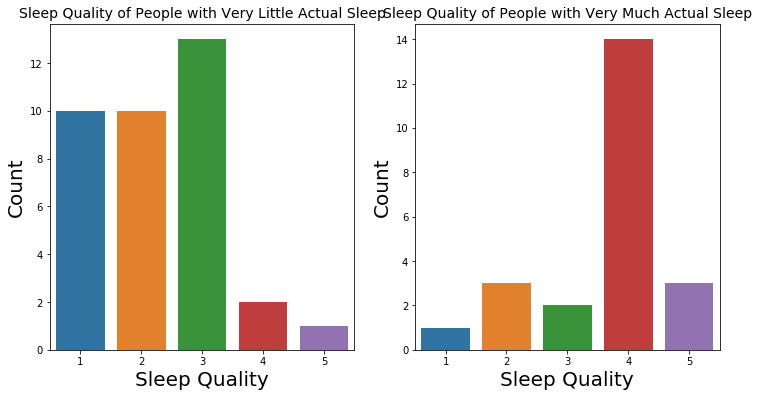

In [17]:
plt.figure(figsize = [12,6])

# Extract lower outliers for hours in bed
actual_sleep_Q1 = sleep['avg_actual_sleep'].quantile(0.25)
actual_sleep_Q3 = sleep['avg_actual_sleep'].quantile(0.75)
IQR = actual_sleep_Q3 - actual_sleep_Q1
actual_sleep_outlier_lower = sleep[(sleep.avg_actual_sleep <= bed_Q1 - 1.5 * IQR)]
print('Number of People with Very Little Actual Sleep: ' + str(actual_sleep_outlier_lower.shape[0]))
print('Sleep Quality of People with Very Little Actual Sleep')
print(actual_sleep_outlier_lower.Q10_a.describe())
actual_sleep_outlier_upper = sleep[(sleep.avg_actual_sleep >= bed_Q1 + 1.5 * IQR)]
print('Number of People with Very Much Actual Sleep: ' + str(actual_sleep_outlier_upper.shape[0]))
print('Sleep Quality of People with Very Much Actual Sleep')
print(actual_sleep_outlier_upper.Q10_a.describe())

# Sleep quality of people with very little actual sleep
plt.subplot(1,2,1)
sns.countplot(x="Q10_a", data = actual_sleep_outlier_lower)
plt.xlabel('Sleep Quality', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Sleep Quality of People with Very Little Actual Sleep', fontsize = 14)

# Sleep quality of people with very much actual sleep
plt.subplot(1,2,2)
sns.countplot(x="Q10_a", data=actual_sleep_outlier_upper)
plt.xlabel('Sleep Quality', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Sleep Quality of People with Very Much Actual Sleep', fontsize = 14);

### 2.2.4 Sleep Efficiency

The distribution of sleep efficiency is very left skewed with a mean of 86.8%, and most people fall in the 80% - 100% range. 

In [18]:
# Summary Statistics of Sleep Efficiency
sleep.sleep_efficiency.describe()

count    1003.000000
mean        0.868295
std         0.125009
min         0.136076
25%         0.808517
50%         0.892157
75%         0.960114
max         1.000000
Name: sleep_efficiency, dtype: float64

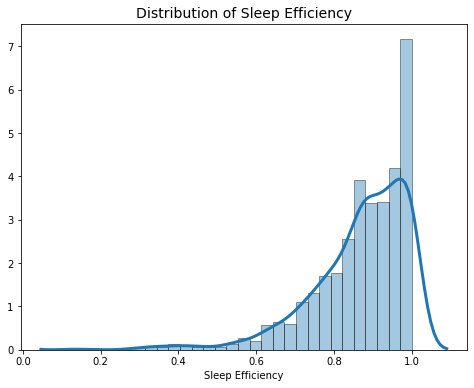

In [19]:
fig = plt.figure(figsize = [8,6])
sns.distplot(sleep.sleep_efficiency, 
             hist = True, kde = True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.title('Distribution of Sleep Efficiency', fontsize = 14)
plt.xlabel('Sleep Efficiency');

**Outliers**  
Because the distribution of sleep efficiency is left skewed with many 100% present, we only zoomed into people with very low sleep efficiency. From the count plot and the summary statistics, we saw that their ratings of sleep quality is not extreme, just a little bit lower than the general population's ratings. 

Number of People with Very Little Sleep Efficiency: 32
count    32.000000
mean      2.968750
std       1.121185
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Q10_a, dtype: float64


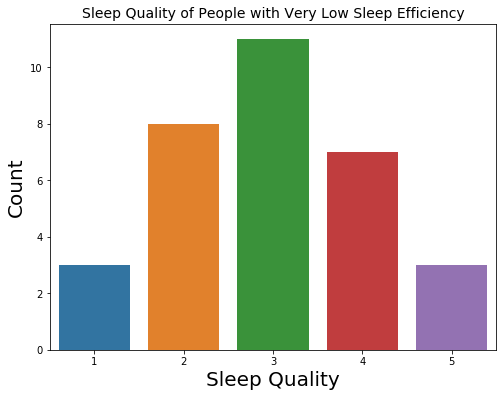

In [20]:
plt.figure(figsize = [8,6])

# Extract lower outliers for sleep efficiency 
eff_Q1 = sleep['sleep_efficiency'].quantile(0.25)
eff_Q3 = sleep['sleep_efficiency'].quantile(0.75)
IQR = eff_Q3 - eff_Q1
eff_outlier_lower = sleep[(sleep.sleep_efficiency <= eff_Q1 - 1.5 * IQR)]
print('Number of People with Very Little Sleep Efficiency: ' + str(eff_outlier_lower.shape[0]))
print(eff_outlier_lower.Q10_a.describe())

# Sleep quality of people with very low sleep efficiency
sns.countplot(x="Q10_a", data=eff_outlier_lower)
plt.xlabel('Sleep Quality', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Sleep Quality of People with Very Low Sleep Efficiency', fontsize = 14);

### 2.2.5 Overall Discussion on Outliers  
We kept all the outliers in our exploration since none of them show significantly abnormal or counter-intuitive features that we need to caution against. We believe that they identify special groups within the participants, and incorporating them enables us to capture variation within the participants. 

## 2.3 Relationships between Variables

### 2.3.1 Sleep Efficiency & Sleep Quality

We grouped participants by their sleep quality and created a kde plot of each group's sleep efficiency. From the plot, we found a trend that as the sleep quality increases, the center of sleep efficiency gets higher, in other words, people with higher sleep quality tend to have higher sleep efficiency.

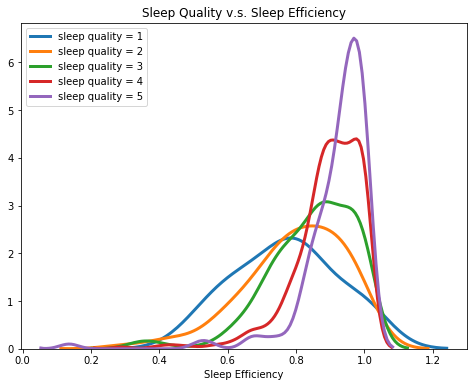

In [21]:
fig = plt.figure(figsize = [8,6])

for i in range(1,6): 
    sns.distplot(sleep.sleep_efficiency.loc[sleep.Q10_a == i], label = 'sleep quality = ' + str(i), hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('Sleep Quality v.s. Sleep Efficiency')
plt.xlabel('Sleep Efficiency')
plt.legend(loc="upper left");

### 2.3.2 Average Hours in Bed & Sleep Quality

Below are kde plots of average bedtime for five different sleep quality. While people with sleep quality from 1 to 4 have very similar kernel distributions, we found out that for people with very low sleep quality (sleep quality = 1), their sleep efficiency is more spread out.

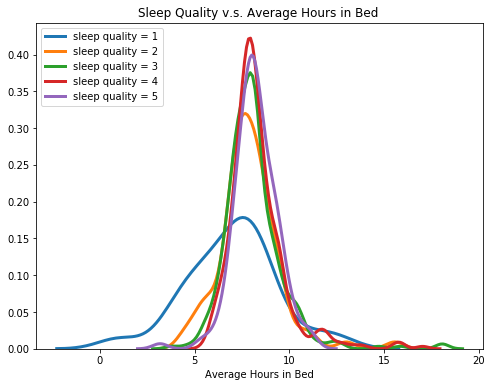

In [22]:
fig = plt.figure(figsize = [8,6])

for i in range(1,6): 
    sns.distplot(sleep.avg_bed.loc[sleep.Q10_a == i], label = 'sleep quality = ' + str(i), hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
    
plt.title('Sleep Quality v.s. Average Hours in Bed ')
plt.xlabel('Average Hours in Bed')
plt.legend(loc="upper left");

### 2.3.3 Average Acutal Sleep & Sleep Quality

Now, we want to study the relationship between sleep quality and average actual sleep hours. Below we divided people into three categories: short sleepers (less than 5.5 hours), moderate sleepers (5.5 - 9.5 hours), long sleepers (above 9.5 hours). 

The thresholds are defined in a paper mentioned in the *backgroud information* section and used bar plots to investivage their sleep quality. 
We found that the distributions of sleep quality for long sleepers and moderate sleepers are very similar, but the sleep quality of short sleepers concentrates on relatively lower ratings. 

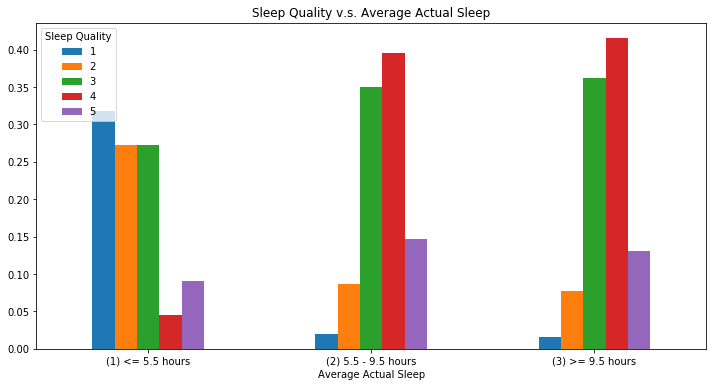

In [23]:
sleep['avg_bed_cat']=sleep['avg_bed']
sleep['avg_bed_cat'].loc[sleep.avg_bed <= 5.5] = "(1) <= 5.5 hours"
sleep['avg_bed_cat'].loc[(sleep.avg_bed > 5.5) & (sleep.avg_bed < 9.5)]= "(2) 5.5 - 9.5 hours"
sleep['avg_bed_cat'].loc[sleep.avg_bed >= 9.5] = "(3) >= 9.5 hours"

bar_data_avg_bed = sleep.groupby('avg_bed_cat', ).Q10_a.value_counts(normalize=True).unstack()
bar_data_avg_bed.plot(rot=0, kind = 'bar',title = 'Sleep Quality v.s. Average Actual Sleep', figsize=(12,6))
plt.legend(loc = 'upper left', title = 'Sleep Quality')
plt.xlabel('Average Actual Sleep');

### 2.3.4 Time Go to Bed & Sleep Efficiency

As discussed in the *Background Information* section, since studies show that time go to bed is important for sleep quality. To group people who go to time at different times, we separated people into two categories: Before Midnight (go to sleep before 12 am) and After Midnight (go to sleep after 12 am). 

We acknowledged that people might go to bed on different times on weekdays and on weekends, so we explored the two time frames separately. From the density plots, we found out that people who go to bed after midnight tend to have a higher sleep efficiency than people who go to bed before midnight, both on weekdays and on weekends. 

It is surprising to find that going to bed late might actually have some positive association with sleep efficiency. 

Average sleep efficiency of people who go to bed before midnight on weekdays is: 0.8625141605715371
Average sleep efficiency of people who go to bed after midnight on weekdays is: 0.8930332160908722
Average sleep efficiency of people who go to bed before midnight on weekends is: 0.862293723575486
Average sleep efficiency of people who go to bed after midnight on weekends is: 0.881838265314815


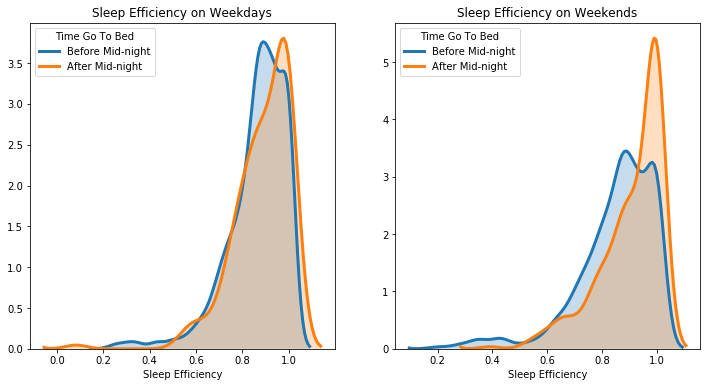

In [24]:
fig = plt.figure(figsize = [12,6])

# Weekdays
ax = fig.add_subplot(121)
sns.distplot(sleep.sleep_efficiency_week.loc[sleep.before_mnt_week == 'Before Mid-night'], label = 'Before Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

print('Average sleep efficiency of people who go to bed before midnight on weekdays is: ' + str(sleep.sleep_efficiency.loc[sleep.before_mnt_week == 'Before Mid-night'].mean()))

sns.distplot(sleep.sleep_efficiency_week.loc[sleep.before_mnt_week == 'After Mid-night'], label = 'After Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

print('Average sleep efficiency of people who go to bed after midnight on weekdays is: ' + str(sleep.sleep_efficiency.loc[sleep.before_mnt_week == 'After Mid-night'].mean()))

plt.title('Sleep Efficiency on Weekdays')
plt.legend(loc = 'upper left', title = 'Time Go To Bed')
plt.xlabel('Sleep Efficiency')

# Weekends
ax = fig.add_subplot(122)
sns.distplot(sleep.sleep_efficiency_weekend.loc[sleep.before_mnt_weekend == 'Before Mid-night'], label = 'Before Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

print('Average sleep efficiency of people who go to bed before midnight on weekends is: ' + str(sleep.sleep_efficiency.loc[sleep.before_mnt_weekend == 'Before Mid-night'].mean()))

sns.distplot(sleep.sleep_efficiency_weekend.loc[sleep.before_mnt_weekend == 'After Mid-night'], label = 'After Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)
print('Average sleep efficiency of people who go to bed after midnight on weekends is: ' + str(sleep.sleep_efficiency.loc[sleep.before_mnt_weekend == 'After Mid-night'].mean()))

plt.title('Sleep Efficiency on Weekends')
plt.legend(loc = 'upper left',title = 'Time Go To Bed')
plt.xlabel('Sleep Efficiency');

### 2.3.5 Time Go to Bed & Sleep Quality

Since we have found that sleep efficiency has a positive relationship with sleep quality, and going to bed after midnight has a positive relationship with sleep efficiency, we wondered whether that going to bed after midnight has a positive relationship with sleep quality due to the increasing sleep efficiency. 

However, we see that people who went to bed after midnight tend to have lower sleep quality than people who went to bed before midnight. Seemingly, the positive influence of going to bed late on sleep efficiency could not compensate for its detrimental effect on sleep quality. As a result, we understood that sleep efficiency does not define sleep quality and we are going to explore other variables that might affect sleep quality.

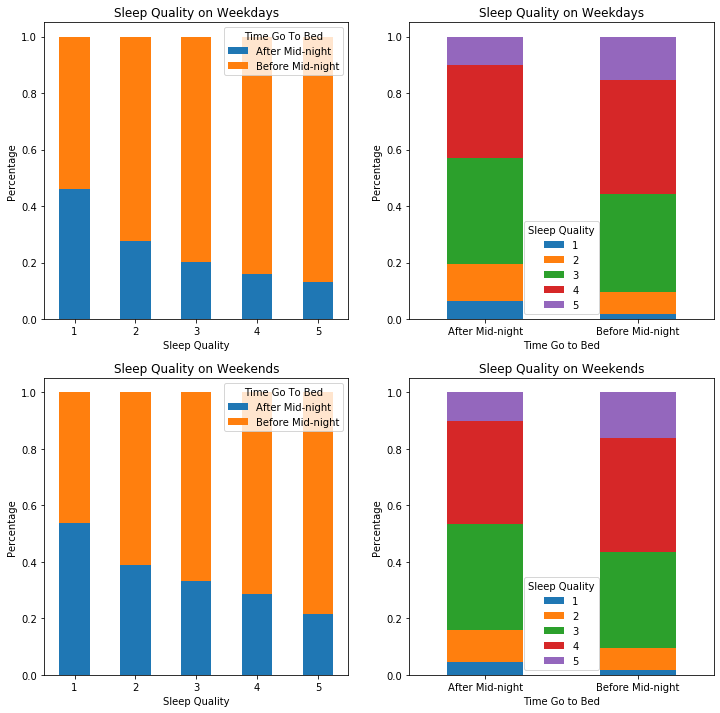

In [25]:
fig = plt.figure(figsize = [12,12])

# Weekdays
ax = fig.add_subplot(221)
bar_data_week = sleep.groupby('Q10_a').before_mnt_week.value_counts(normalize=True).unstack()
bar_data_week.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekdays', stacked = True, ax = ax)
plt.legend(title = 'Time Go To Bed')
plt.xlabel('Sleep Quality')
plt.ylabel('Percentage')

# Weekends
ax = fig.add_subplot(223)
bar_data_weekend = sleep.groupby('Q10_a').before_mnt_weekend.value_counts(normalize=True).unstack()
bar_data_weekend.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekends', stacked = True, ax = ax)
plt.legend(title = 'Time Go To Bed')
plt.xlabel('Sleep Quality')
plt.ylabel('Percentage')

# Weekdays
ax = fig.add_subplot(222)
bar_data_week2 = sleep.groupby('before_mnt_week').Q10_a.value_counts(normalize=True).unstack()
bar_data_week2.plot(rot=0, kind = 'bar', title = 'Sleep Quality on Weekdays', stacked = True, ax = ax)
plt.legend(title = 'Sleep Quality')
plt.xlabel('Time Go to Bed')
plt.ylabel('Percentage')


# Weekends
ax = fig.add_subplot(224)
bar_data_weekend2 = sleep.groupby('before_mnt_weekend').Q10_a.value_counts(normalize=True).unstack()

bar_data_weekend2.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekends', stacked = True, ax = ax)
plt.legend(title = 'Sleep Quality')
plt.xlabel('Time Go to Bed')
plt.ylabel('Percentage')

plt.show();

### 2.3.6 Sleep Disorders & Sleep Quality

We are interested in sleep disorders that participants possess. The survey asked participants whether they have been diagnosed sleep disorders or not and then specify the type of discorder they have if the anwer is yes.  

From the first pie chart below, we can see that 10.8% of the participants who finished the survey have been diagnosed with sleep disorders. And the second pie chart shows among those people who have a sleep disorder, the majority, 73.7%, have Apnea. 

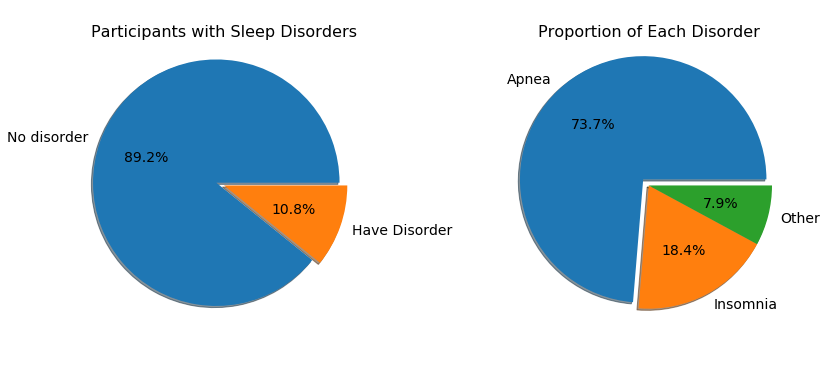

In [26]:
fig = plt.figure(figsize = [12,6])
plt.subplot(1,2,1)

labels = 'No disorder','Have Disorder'
sizes = [sleep.Q22_rev.value_counts()[0], sleep.Q22_rev.value_counts()[1]]
plt.axis('equal')
plt.pie(sizes, labels=labels,radius=1.5,autopct='%0.1f%%',shadow=True,explode=[0.1,0],textprops={'fontsize': 14})
plt.title('Participants with Sleep Disorders', y = 0.9, size = 16)

labels = 'Apnea', 'Insomnia', 'Other'
sizes = [sleep['Q23_a'].value_counts()[1], sleep['Q23_b'].value_counts()[1],sleep['Q23_c'].value_counts()[1]]
plt.subplot(1,2,2)
plt.axis('equal')
plt.pie(sizes, labels=labels, radius=1.5,autopct='%0.1f%%',shadow=True,explode=[0.1,0,0], textprops = {'fontsize': 14})
plt.title('Proportion of Each Disorder', y = 0.9, size = 16)
plt.tight_layout(w_pad = 4);

When we focused on people who have been diagnosed with sleep disorder, their sleep quality is relatively lower than people without disorders according to the plot below. 

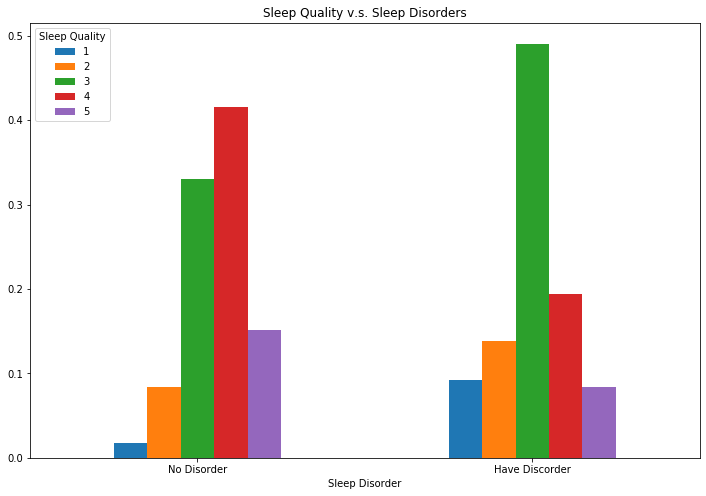

In [27]:
bar_data_disorder = sleep.loc[sleep.Q22_rev != -1].groupby('Q22_rev').Q10_a.value_counts(normalize=True).unstack()
bar_data_disorder.plot(rot=0, kind = 'bar',title = 'Sleep Quality v.s. Sleep Disorders', figsize=(12,8))
plt.legend(loc = 'upper left', title = 'Sleep Quality')
plt.xticks([0,1], ['No Disorder', 'Have Discorder'])
plt.xlabel('Sleep Disorder');

### 2.3.7 Other Factors Correlated with Sleep Quality

Scrutinizing our original dataset, we also want to explore other factors that could possibly affect sleep quality. We extracted variables that asked participants to rate how often "Health Problems", "Outside Noise", "Inside Noise", "Light","Temperature", "Uncomfortable Mattress", "Motivation to Sleep", "Importance of Sleep" affected their sleep. We also used attitudes toward sleep: "Q16: how motivated to make sure have enough time to sleep" and "Q17: how important a part of routine is going to bed at a suitable time". 

Below is the correlation plot among those variables and sleep quality. We found out that "Motivation to Sleep"(r = 0.15) and "Importance of Sleep" (r = 0.13) have positive relationship with sleep quality, and other variables all have negative relationships with sleep quality. (The most negatively associated variable is "health problems").  

These findings are consistent with common belief about sleep, so we are going to incorporate these variables in our models and further investigate their relationship with sleep quality. 

<Figure size 864x864 with 0 Axes>

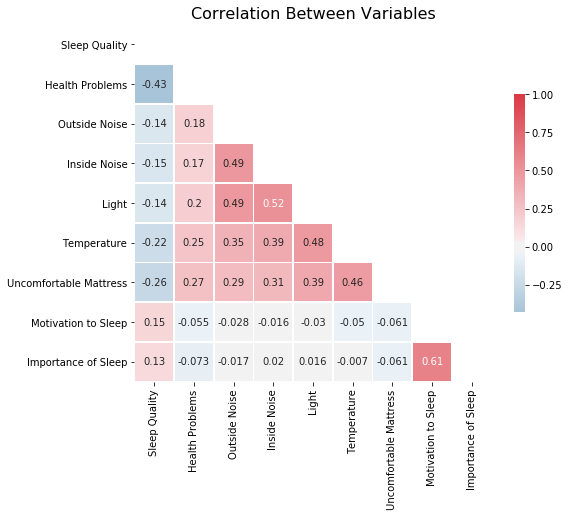

In [28]:
corr_data = sleep.loc[:, ['Q10_a','Q14a','Q15_a', 'Q15_b', 'Q15_c', 'Q15_d', 'Q15_e','Q16_rev', 'Q17_rev']]
corr_data.columns = [ 'Sleep Quality', 'Health Problems', 'Outside Noise', 'Inside Noise', 'Light','Temperature', 'Uncomfortable Mattress', 'Motivation to Sleep', 'Importance of Sleep']

# Filter out all the refused to respond
corr_data=corr_data.loc[corr_data['Light']!=-1,]
corr_data=corr_data.loc[corr_data['Motivation to Sleep']!=-1,]
corr_data=corr_data.loc[corr_data['Importance of Sleep']!=-1,]
corr_data=corr_data.loc[corr_data['Inside Noise']!=-1,]
corr_data=corr_data.loc[corr_data['Uncomfortable Mattress']!=-1,]
corr_data=corr_data.loc[corr_data['Health Problems']!=-1,]
corr_data=corr_data.loc[corr_data['Motivation to Sleep']!=7,]
corr_data=corr_data.loc[corr_data['Importance of Sleep']!=7,]

fig = plt.figure(figsize = [12,12])
corr = corr_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
figure, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(600, 10, as_cmap = True)
sns.heatmap(corr, mask = mask,cmap = cmap, center=0,
            square = True, linewidths = .5, annot = True, cbar_kws={"shrink": .5})
plt.title('Correlation Between Variables', size = 16);

**Very Sensitive Participants**  
We can see that participants' ratings of the frequencies that the five environmental factors affect their sleep are positively correlated. Therefore, as what we briefly mentioned in the variable construction section, we created a dummy variable, 'sensitive', that divides people with regards to whether they are 'sensitive' to environmental factors. People who have average ratings >= 4 (range: 1 - 5) for the effects of the 5 environmental factors are considered as sensitive.  
When we look at the group who are categorized as sensitive to environmental factors, their sleep quality is relatively lower, which is consistent with the common belief. 

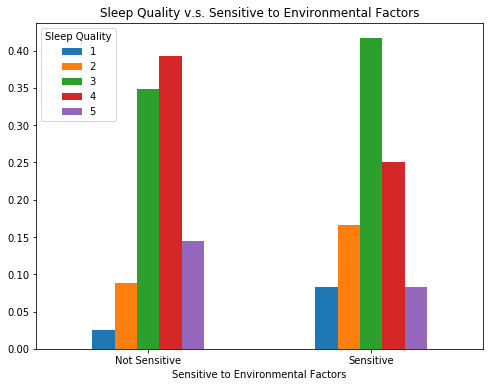

In [29]:
bar_data_sensitive = sleep.groupby('sensitive').Q10_a.value_counts(normalize=True).unstack()

bar_data_sensitive.plot(rot=0,kind = 'bar', figsize=(8,6))
plt.title('Sleep Quality v.s. Sensitive to Environmental Factors')
plt.legend(title = 'Sleep Quality',loc="upper left")
plt.xticks([0,1], ['Not Sensitive', 'Sensitive'])
plt.xlabel('Sensitive to Environmental Factors');

# 3. Modeling

After exploring each variable's relationship with sleep quality in the *Exploratory Analysis* setion, we now start to use models to combine those variable together and investigate their relationship with sleep quality while controlled for the others. Namely, we use sleep quality as our response variable, and other variables that we explored in the last section as predictors. 

## 3.1 Linear Regression

We understand that our response variable `sleep quality` is ordinal, and by fitting a linear regression model, we would be assuming that:
 
    The response variable is continuous, which means the numerical distance between each set of subsequent categories is equal.
Such assumption would make the resulting coefficients hard to interpret and obscure the meaning of the predicted values.

However, we believe the linear regression is a nice initial start to look at the mutual relationship of all the variables with sleep quality. We first extracted and cleaned the data frame used for the linear regression. 

In [30]:
# Data for Regression
sleep_regression = sleep[['sleep_efficiency','avg_bed','avg_actual_sleep','Q10_a','before_mnt_week','before_mnt_weekend','Q22_rev','Q16_rev','Q17_rev','Q15_a','Q15_b','Q15_c','Q15_d','Q15_e','Q14a','Q10_a_3']]

sleep_regression.columns=['sleep_efficiency','avg_hrs_in_bed','avg_actual_sleep','sleep_quality','weekday_midnight','weekend_midnight',"disorder","motivation_to_sleep","importance_of_sleep","outside_noise","inside_noise","light","temperature","uncomfortable_mattress","health_problems", "sm_quality"]

# Filter out all the refused to respond
df=sleep_regression
df=df.loc[df.disorder!=-1,]
df=df.loc[df.light!=-1,]
df=df.loc[df.motivation_to_sleep!=7,]
df=df.loc[df.importance_of_sleep!=7,]
df=df.loc[df.inside_noise!=-1,]
df=df.loc[df.uncomfortable_mattress!=-1,]
df=df.loc[df.health_problems!=-1,]

# Recode 'weekday_midnight' & 'weekend_midnight' into 0/1 variables
df.weekday_midnight=df['weekday_midnight'].replace(['Before Mid-night'],0)
df.weekday_midnight=df['weekday_midnight'].replace(['After Mid-night'],1)
df.weekend_midnight=df['weekend_midnight'].replace(['Before Mid-night'],0)
df.weekend_midnight=df['weekend_midnight'].replace(['After Mid-night'],1)

We used a correlation plot to have a initial investigation on the correlation between variables in our dataset for regression. The plot confirmed our findings in the *Exploratory Analysis* section. Also, it cautioned us against potential collinearity issues, which would be adjusted. 

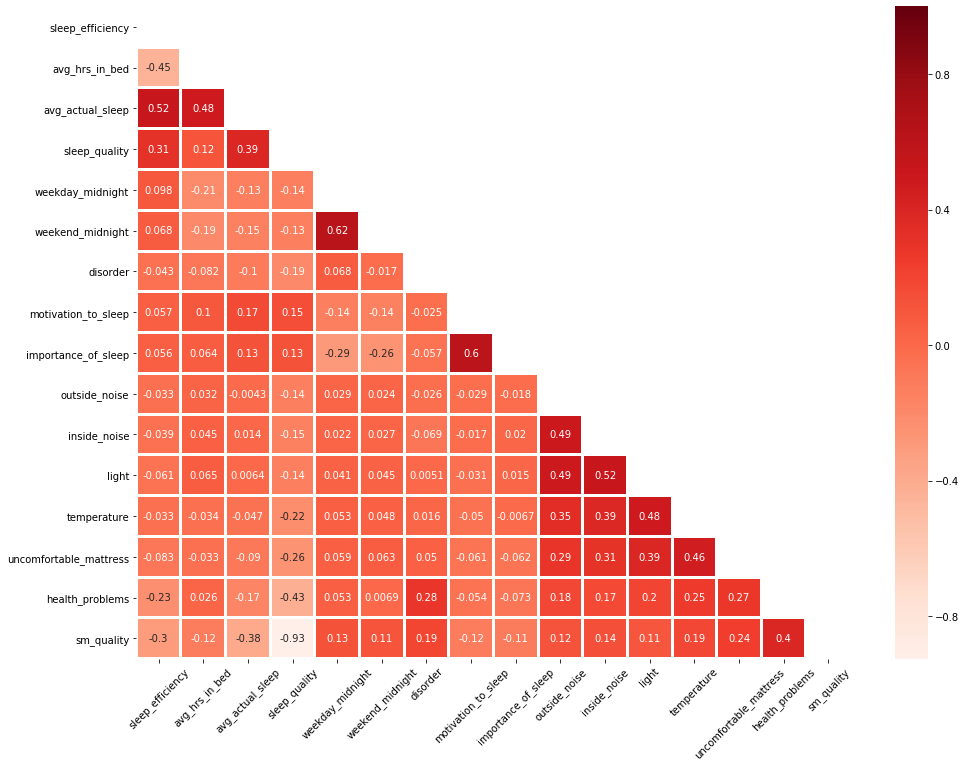

In [31]:
# Pearson Correlation among Predictors
plt.figure(figsize=(16,12))
cor = df.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, annot=True,linewidths=2,mask=mask,center=0,cmap=plt.cm.Reds)
plt.xticks(rotation=45)
plt.show();

Hence, we investigated the collinearity issue using **Variable Inflation Factor (VIF)**, and we found that sleep efficiency, average hours in bed, and average acutal sleep are highly collinear with VIF >> 5. 

In [32]:
features = "+".join(df.columns.drop(["sleep_quality","sm_quality"]))
Y, X = dmatrices('sleep_quality ~' + features, df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif[1:].round(1)

,VIF Factor,features
1,11.5,sleep_efficiency
2,10.5,avg_hrs_in_bed
3,11.7,avg_actual_sleep
4,1.7,weekday_midnight
5,1.7,weekend_midnight
6,1.1,disorder
7,1.6,motivation_to_sleep
8,1.7,importance_of_sleep
9,1.5,outside_noise
10,1.6,inside_noise


As `sleep efficiency` is the predictor that we are most interested in, we kept it in the model and dropped `average actual sleep`, which had a VIF as high as `sleep efficiency`. When checking the VIFs again, we found this attempt easily resolved the collinearity problem. 

In [33]:
# According to the VIF, we drop the average actual sleep time
features = "+".join(df.columns.drop(["sleep_quality","sm_quality","avg_actual_sleep"]))
Y, X = dmatrices('sleep_quality ~' + features, df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif[1:].round(1)

,VIF Factor,features
1,1.4,sleep_efficiency
2,1.4,avg_hrs_in_bed
3,1.7,weekday_midnight
4,1.7,weekend_midnight
5,1.1,disorder
6,1.6,motivation_to_sleep
7,1.7,importance_of_sleep
8,1.5,outside_noise
9,1.6,inside_noise
10,1.7,light


### 3.1.1 The Full Linear Regression Model

The R-squared and the adjusted R-squared of the full linear regression model with 10 variables are both 0.956, which are really high and indicate that our model has decent predictive power. 

In [34]:
X=df.drop(['sleep_quality','sm_quality', 'avg_actual_sleep'],axis=1)
Y=df[['sleep_quality']]
model1 = sm.OLS(Y, X).fit()
predictions1 = model1.predict(X)
sleep_model_summary = model1.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(sleep_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

Looking at the count plot of our predicted values from the full linear regression model below, we see that the distribution is more skewed to the left than the distribution of the actual values, and the model predicts fewer people with extreme sleep qualities (sleep quality = 1 or 5) than the actual numbers.  

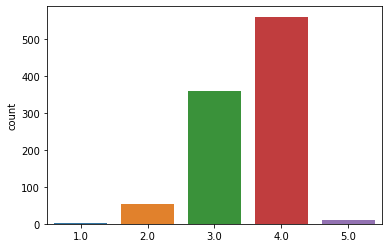

In [35]:
sns.countplot(np.round(predictions1))

### 3.1.2 Best Subset Variable Selection

From the summary of the full linear regression model, we found that coefficients of 7 variables, `sleep_efficiency`, `avg_hrs_in_bed`, `disorder`, `motivation_to_sleep`, `light`, `uncomfortable_mattrees`, and  `health_problems`, are statistically significant using a significance level = 0.05.  

Among these variable, keeping everything else the same, we would expect that the higher the sleep efficiency and the average hours in bed, and the more motivated to make sure have enough time to sleep, the better the sleep quality. On the contrary, the more often that the person think that light, uncomfortable mattress, and health problems affected their sleep, or if the person has sleep disorder, the lower the sleep quality.   

In [36]:
# Define a function that fit the linear regression and returns the RSS and R_squared
%matplotlib inline
plt.style.use('ggplot')
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

Since we also saw a lot of variables with not significant coefficients in the full model, we wondered for each number of predictors, what is the best subset of variables that produce the **lowest RSS** or the **highest R-square** and whether we can limit our model to one with better performance. 

In [37]:
k = 13
RSS_list, R_squared_list, feature_list = [],[],[]
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
dff = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [38]:
# Subsets with the lowest RSS at each size
df_min = dff[dff.groupby('numb_features')['RSS'].transform(min) == dff['RSS']]
#df_max = dff[dff.groupby('numb_features')['R_squared'].transform(max) == dff['R_squared']]
display(df_min)

,numb_features,RSS,R_squared,features
12,1,704.638276,0.183669,"(health_problems,)"
24,2,664.327815,0.230370,"(sleep_efficiency, health_problems)"
101,3,608.850438,0.294641,"(sleep_efficiency, avg_hrs_in_bed, health_prob..."
431,4,594.678896,0.311059,"(sleep_efficiency, avg_hrs_in_bed, uncomfortab..."
1136,5,586.975704,0.319983,"(sleep_efficiency, avg_hrs_in_bed, weekday_mid..."
2498,6,582.912146,0.324690,"(sleep_efficiency, avg_hrs_in_bed, weekday_mid..."
4269,7,579.145801,0.329054,"(sleep_efficiency, avg_hrs_in_bed, weekday_mid..."
6097,8,576.009610,0.332687,"(sleep_efficiency, avg_hrs_in_bed, weekend_mid..."
7341,9,574.378670,0.334577,"(sleep_efficiency, avg_hrs_in_bed, weekend_mid..."
7846,10,573.032434,0.336136,"(sleep_efficiency, avg_hrs_in_bed, weekday_mid..."


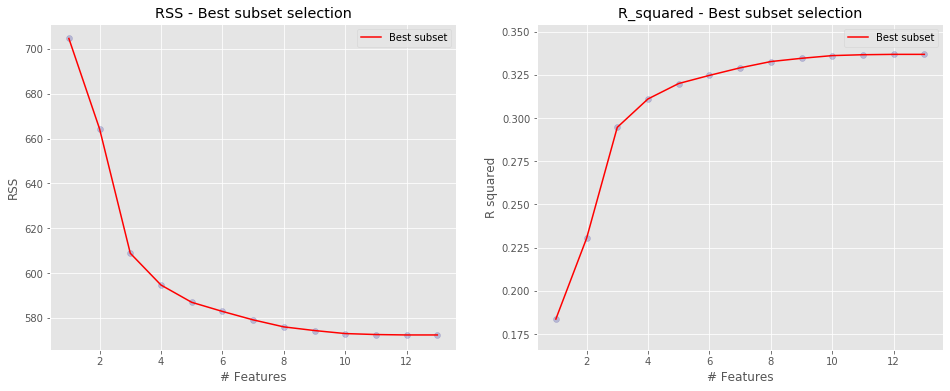

In [39]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df_min.numb_features,df_min.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df_min.numb_features,df_min.RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df_min.numb_features,df_min.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df_min.numb_features,df_min.R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show();

According to the statistics from the best subset selection, we went one step further to fit a model with only 10 variables.  
We found that the 7 variables that had statistically significant coefficients in the full model are all kept in the model with fewer variables and are still the only variables that had statistically significant coefficients. Also, the directions of their associations with sleep quality are the same.  

After fitting a linear regression model using only these 7 variables, the R-squared and the adjusted R-squared of the resulting model are both 0.956, the same as the values for the full model, indicating that the new model selected via best subset selection has similar predictive power as the full model with 3 fewer variables. Therefore, for parsimony principle, we would recommend using the model with only 7 variables instead of the full model. 

In [40]:
X=df.drop(['sleep_quality','avg_actual_sleep','importance_of_sleep','light','outside_noise','sm_quality'],axis=1)
Y=df[['sleep_quality']]
model2 = sm.OLS(Y, X).fit()
predictions2 = model2.predict(X)
sleep_model_summary = model2.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(sleep_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

Looking at the count plot of our predicted values from the linear regression model with only 7 variables below, the distribution has similar characteristics as the distribution from the full linear regression model. In fact, the distribution of predicted values from the linear regression model with only 7 variables is very similar to the distribution of predicted values from the full linear regression model. The distribution is more skewed to the left than the distribution of the actual values, and the model predicts fewer people with extreme sleep qualities (sleep quality = 1 or 5) than the actual numbers.  

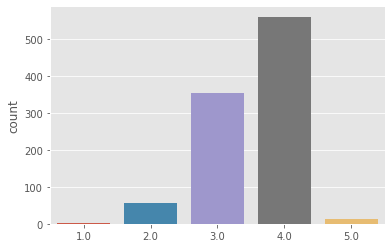

In [41]:
sns.countplot(np.round(predictions2))

By separating the multiple linear regression into prtial regression plots, we can see the significant relationships mentioned above. 

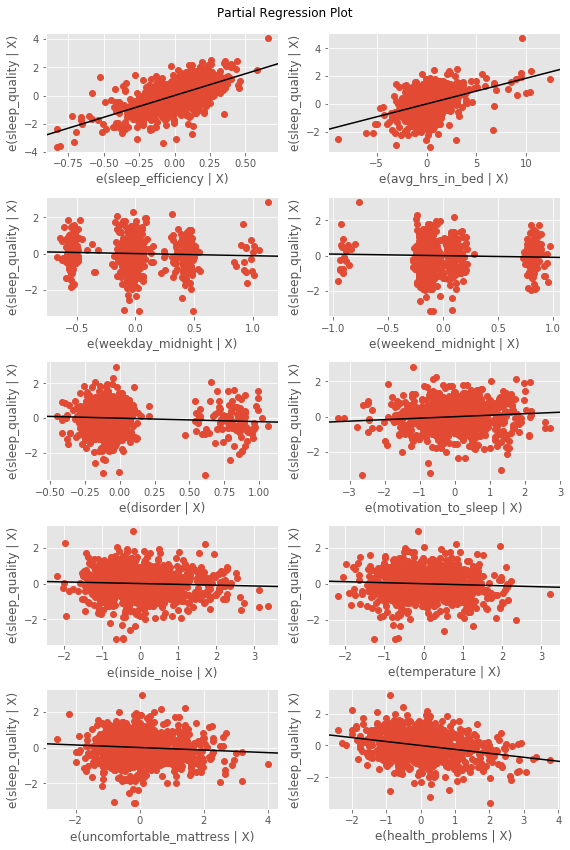

In [42]:
fig = plt.figure(figsize=(8,12))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)

## 3.2 Decision Tree

As mentioned above, our response variable sleep quality is ordinal. Taken that into consideration, we aimed to fit a classification model for prediction. For simplicity and performance, we used sleep quality rating recoded as 3 categories (1-2 as 1, 3 as 2, 4-5 as 3, which is the common partition method for a 5-point Likert scale and what suggested by the study) as the response variables in classification models. 

We chose decision tree because it is easy to follow. We aim at enabling people, especially our peers, to have a detailed understanding of their sleep quality, and people can read a decision tree even without knowledge in statistics. Also, a lot of our predictors are also ordinal, which is suitable for a decision tree. 

In [43]:
X = df.drop(columns = ['sleep_quality','sm_quality'])
Y = df['sm_quality']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.35)

We split data into a training sample (65% of the data) and a test sample (35% of the data). The prediction accuracy of our decision tree is 0.639 for the training data and 0.635 for the test data, which are not very different and indicate that our model is not exposed to very serious overfitting. 

In [44]:
np.random.seed(123)
clf = DecisionTreeClassifier(max_leaf_nodes = 10)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [45]:
# Predict the response for training dataset
y_pred = clf.predict(X_train)
# Train Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.6484375


In [46]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Test Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6202898550724638


From 10-fold cross-validation, the average accuracy is 0.612, which is also not much smaller than our training accuracy. This performance statistic again supports the statement that our model does not experience high over-fitting. 

In [47]:
decision_tree = DecisionTreeClassifier(max_leaf_nodes = 10)
scores = cross_validate(decision_tree, X, Y, scoring='accuracy', cv=10)
scores['test_score'].mean()

0.6123033427054045

True

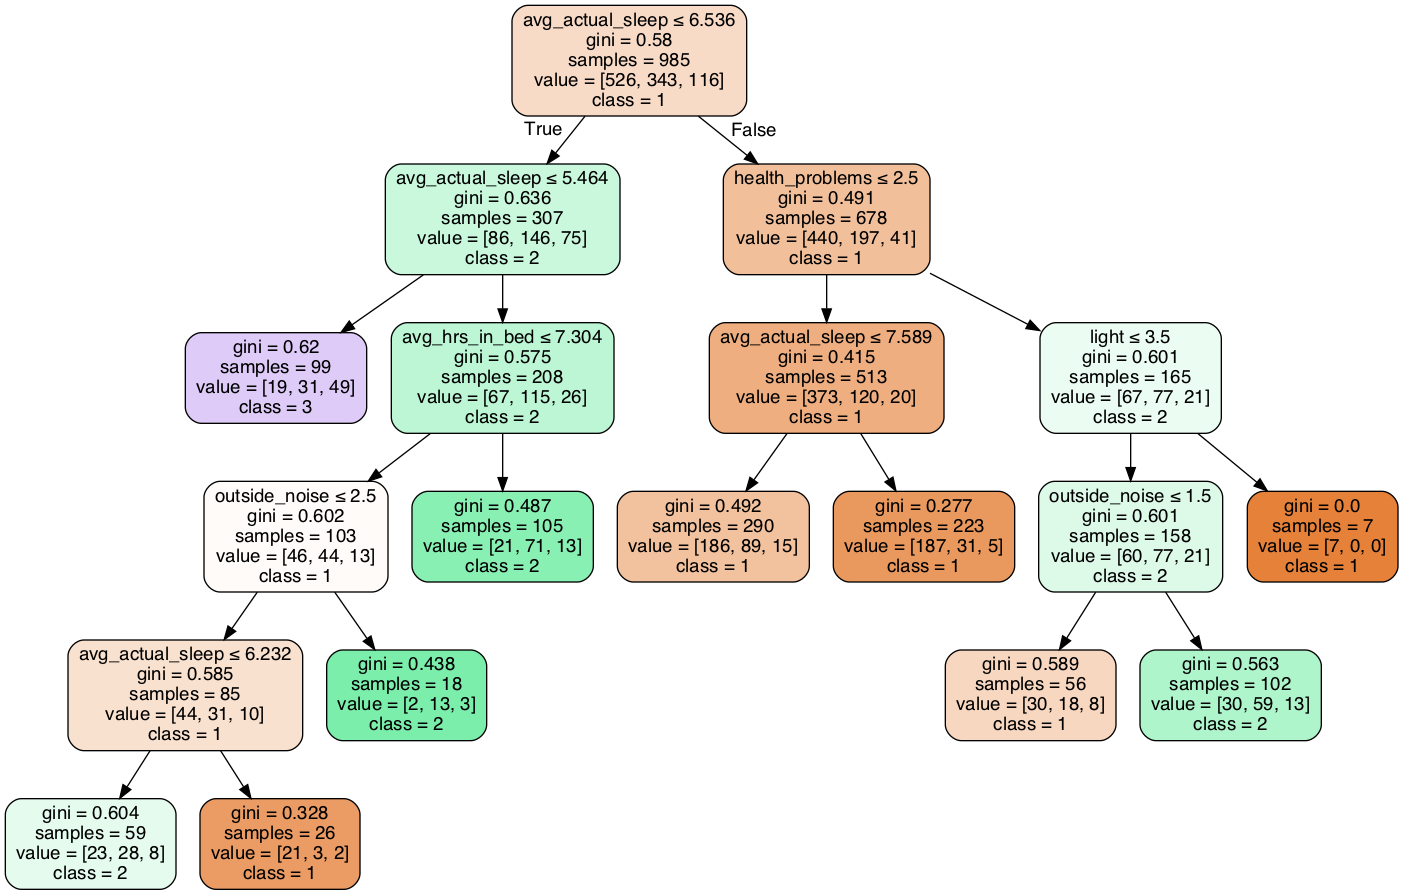

In [48]:
clf = clf.fit(X,Y)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, 
                special_characters=True,feature_names = ['sleep_efficiency','avg_hrs_in_bed','avg_actual_sleep','weekday_midnight','weekend_midnight',"disorder","motivation_to_sleep","importance_of_sleep","outside_noise","inside_noise","light","temperature","uncomfortable_mattress","health_problems"],class_names=['1','2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# 4. Conclusion

Our data exploratory process confirmed that sleep quality is associated with sleep efficiency, average hours in bed, average actual sleep,time go to bed, sleep disorder, how motivated to make sure have enough time to sleep, and  how important a part of routine is going to bed at a suitable time, environmental factors, and health problems. 

From our multiple linear regression model, we found that among all these variables, sleep efficiency, average hours in bed, sleep disorder, how motivated to make sure have enough time to sleep, light, uncomfortable mattrees, and  health problems, are especially significantly associated with sleep quality. 

We also built a decision tree with cross-validation accuracy of 61.23%. 

# 5. Limitations

1. Since we don’t have the demographic data for this dataset for confidentiality reason, we are unable to take participants' demographic characteristics into consideration. If participants can be divided into different groups with respect to their demographics, we might be able to incorporate the influence of those variables as well as obtain more in-depth insights into sleep quality within each group. 

2. Our response variable, sleep quality is measured from a Likert scale. Thus, it is not a very precise measure and exposed to subjectivity. If possible, using clinical measurements, such as electro-oculography (EOG), could be more precise and objective. 
